# EDA - Mobile-Driven Purchase Behavior Analysis

_An exploratory data analysis (EDA) focused on identifying user behavior patterns related to mobile purchasing, buyer confidence, demographics, impulsive buying influenced by discounts, and the synchronization between mobile usage habits and online shopping activity._

<img src="https://www.itexchangeweb.com/blog/wp-content/uploads/2017/12/image-blog.png" width="90%">

<div style="background-color:#cdcdcd;color:black;">

## 1.  Objetivo

</div>

El CEO de una empresa de ecommerce está preocupado por la baja retención de los compradores y usuarios. Se ha propuesto poner en marcha 3 lineas de actuación con los siguientes objetivos:
1. Hacer más atractivo el catálogo de productos ofertados.
2. Mejorar la usabilidad de la web.
3. Aumentar el ratio de usuarios que compran a través de su app y de la versión móvil de su web.

En relación al tercer punto, han visto que la proporción del uso móvil es menor de lo habitual en el sector, y quieren analizar los datos que ya tienen de sus usuarios para sacar patrones que ayuden al equipo de producto y de marketing a tomar decisiones sobre estrategias a implementar.

Por una parte, el equipo de marketing lanzó una aplicación independiente del ecommerce que utilizan tan sólo para recabar información de usuarios, además de para enviarles publicidad y promociones, con la que han logrado tener datos del uso de los dispositivos móviles de los usuarios.

Por otra parte, tienen el registro de las operaciones de compra del ecommerce durante un año, en el que tienen identificados aquellos que han comprado a través de dispositivos móviles y de los cuales conocen su edad, género, tipo de dispositivo, etc.

<div style="background-color:#cdcdcd;color:black;">

## 2. Hipótesis

</div>

- **Confianza del comprador** // Dataset 2<br>
Los usuarios que compran desde el móvil previamente han comprado desde Desktop

- **Confianza del comprador** // Dataset 2<br>
Hay relación entre plazos de entrega previos y la repetición de compra?

- **Perfil** // Dataset 2<br>
Hay diferencias de género o edad entre los compradores 'mobile' recurrentes?

- **Oferta** // Dataset 2<br>
Hay categorías de producto que destaquen para la primera compra móvil?

- **Compras impulsivas** // Dataset 2<br>
Tienen más efecto los descuentos en las compras móviles que en las Desktop?

- **Sincronía horaria de uso y compra** // Datasets 1 y 2 <br>
  ¿Se solapan las horas de mayor actividad en el móvil con las horas pico de compra online?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

<div style="background-color:#cdcdcd;color:black;">

## 3. Procesamiento y limpieza de Datasets

</div>

<div style="background-color:#909090;color:black;">

### 3.1. Dataset 1. Mobile Device Usage & User Behavior
</div>

   – Fuente: Kaggle  
   – Link: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset


#### 3.1.1. Resumen:
El dataset contiene 700 muestras sobre patrones de uso de dispositivos móviles y clasifica a los usuarios en cinco niveles de comportamiento, desde uso ligero hasta extremo. Incluye datos como tiempo diario de uso de apps, horas con pantalla activa, consumo de batería y datos móviles, además de características demográficas como edad y género. Cada usuario está identificado con un ID único, modelo de dispositivo y sistema operativo (iOS o Android).

#### 3.1.2. Descripción de los Datos:
- **ID de usuario**: Identificador único de cada usuario.
- **Modelo del dispositivo**: Modelo del smartphone del usuario.
- **Sistema operativo**: El sistema operativo del dispositivo (iOS o Android).
- **Tiempo de uso de aplicaciones**: Tiempo diario dedicado a aplicaciones móviles, medido en minutos.
- **Tiempo con la pantalla encendida**: Promedio de horas diarias que la pantalla está activa.
- **Consumo de batería**: Consumo diario de batería en mAh.
- **Número de aplicaciones instaladas**: Total de aplicaciones disponibles en el dispositivo.
- **Uso de datos**: Consumo diario de datos móviles en megabytes.
- **Edad**: Edad del usuario.
- **Género**: Sexo del usuario (hombre o mujer).
- **Clase de comportamiento del usuario**: Clasificación del comportamiento del usuario según patrones de uso (1 a 5).

In [2]:
df_1 = pd.read_csv('data/user_behavior_dataset.csv')
df_1.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
df_1.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


#### 3.1.3 Comprobación de datos nulos o duplicados

Comprobamos si hay datos nulos en el Dataset 1 y si existen registrors duplicados.

In [5]:
#comprobamos si hay datos nulos
print('Valores nulos en el Dataset 1:\n',
      df_1.isnull().sum()
      )

Valores nulos en el Dataset 1:
 User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64


In [6]:
#comprobando si hay datos duplicados
print('Valores duplicados en el Dataset 1:',
      df_1.duplicated().sum()
      )

Valores duplicados en el Dataset 1: 0


- No hay datos nulos en el Dataset 1, tal como hemos visto también previamente en info().
- No hay datos duplicados en el Dataset 1.

#### 3.1.4 Corrección de datos incorrectos y estandarización

**Tipos: Object → Category**<br>
Primero, comprobamos los tipos de las diferentes variables, de manera que podamos seleccionar aquellas de tipo 'object' y convertimos las que tienen pocos valores diferentes en variables de tipo 'category', ya que nos facilitará más adelante crear visualizaciones.

In [7]:
# comprobamos los tipos de las diferentes variables
df_1.dtypes

User ID                         int64
Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object

In [8]:
# Columnas tipo object
objetos = df_1.select_dtypes(include='object')
print(objetos.info())

# Revisamos los valores únicos de los objetos
print('\nValores únicos:')
for col in objetos:
    print('\n', col, '→', df_1[col].nunique(), ':\n', df_1[col].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Device Model      700 non-null    object
 1   Operating System  700 non-null    object
 2   Gender            700 non-null    object
dtypes: object(3)
memory usage: 16.5+ KB
None

Valores únicos:

 Device Model → 5 :
 ['Google Pixel 5' 'OnePlus 9' 'Xiaomi Mi 11' 'iPhone 12'
 'Samsung Galaxy S21']

 Operating System → 2 :
 ['Android' 'iOS']

 Gender → 2 :
 ['Male' 'Female']


In [9]:
#Convertimos los Object con pocos valores diferentes al tipo category
df_1['Operating System'] = df_1['Operating System'].astype('category')
df_1['Gender'] = df_1['Gender'].astype('category')

# revisamos los tipos de las columnas
df_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User ID                     700 non-null    int64   
 1   Device Model                700 non-null    object  
 2   Operating System            700 non-null    category
 3   App Usage Time (min/day)    700 non-null    int64   
 4   Screen On Time (hours/day)  700 non-null    float64 
 5   Battery Drain (mAh/day)     700 non-null    int64   
 6   Number of Apps Installed    700 non-null    int64   
 7   Data Usage (MB/day)         700 non-null    int64   
 8   Age                         700 non-null    int64   
 9   Gender                      700 non-null    category
 10  User Behavior Class         700 non-null    int64   
dtypes: category(2), float64(1), int64(7), object(1)
memory usage: 51.0+ KB


**Tipos Numéricos**<br>
Ahora comprobamos si alguna variable numérica tiene valores fuera de lo común. Para ello, utilizamos una visualización **boxplot** ya que muestran el rango intercuartílico (IQR), la mediana y los valores atípicos de un vistazo.

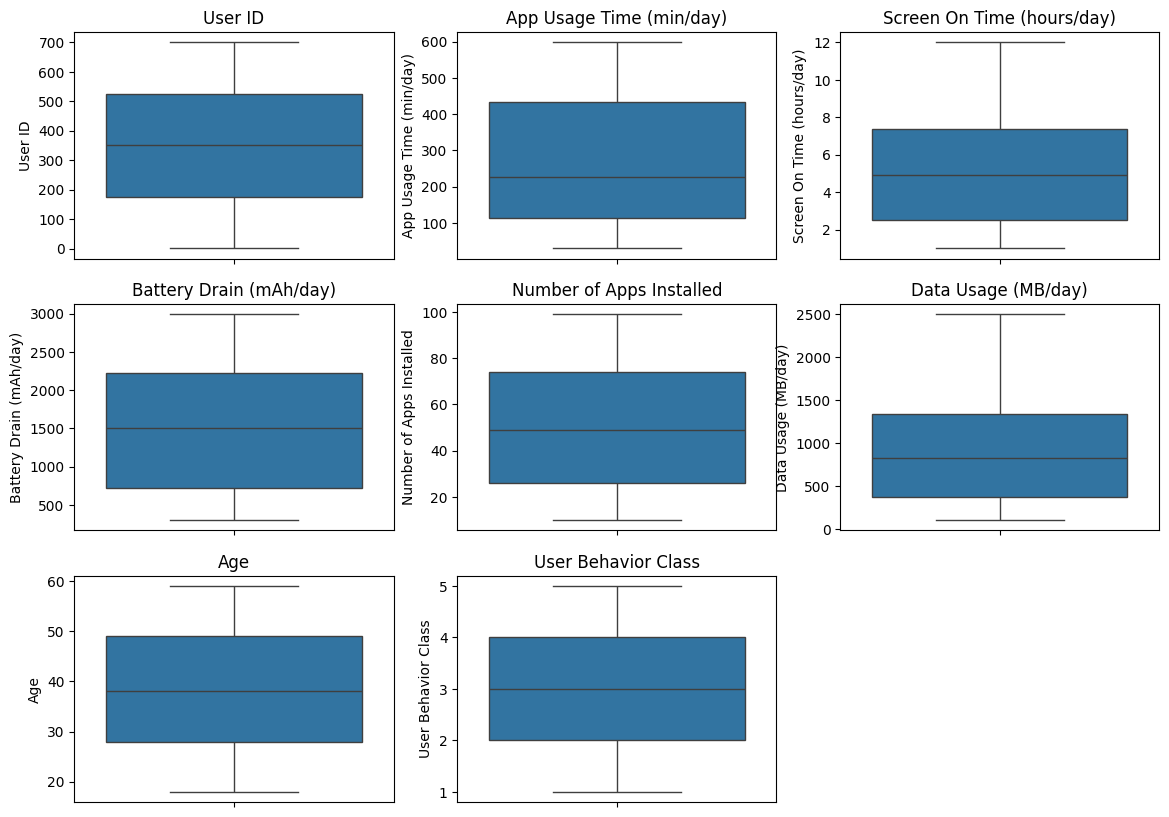

In [15]:
# Seleccionamos solo las columnas numéricas
numeric_cols = df_1.select_dtypes(include='number').columns

# Creamos un boxplot por cada variable numérica
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_1[col])
    plt.title(col)
    #plt.tight_layout()

plt.show()


#### Conclusiones para el Dataset 1:
No hay valores que se salgan de lo normal. No se aprecian errores ni hay outliers y todos los valores bastante razonables. Quizás en _Battery Drain_ y _Data Usage_ podríamos ver algunos datos muy altos, pero no creo que sean fuera de la norma.

Por lo tanto, considero que habría que mantener todos los registros.

<div style="background-color:#909090;color:black;">

### 3.2. Dataset 2: E-commerce Dataset
</div>

   – Fuente: Kaggle  
   – Link: https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset/data

#### 3.2.1. Resumen:
Este dataset contiene un año de datos de compras online de una empresa estadounidense, con detalles de cada pedido, como fechas, tiempos de entrega, perfil del cliente (género y login), así como información del producto (categoría, cantidad, descuentos) y aspectos financieros (ventas, beneficio, coste de envío). Quizás lo más importante, ya que me va a permitir utilizarlo con mis hipótesis: también diferencia las compras por tipo de dispositivo.

Hay más de 50.000 registros en el dataset, de los cuales casi 40.000 son usuarios únicos.
Se identifican 3.658 registros realizados desde dispositivos móviles, de 3.557 usuarios diferentes.

#### 3.2.2. Descripción de los Datos:
- **Order_Date**: Fecha en que se realizó el pedido.
- **Aging**: Tiempo desde la orden hasta la entrega del producto.
- **Customer_id**: Identificador único de cada cliente.
- **Gender**: Género del cliente.
- **Device_Type**: Dispositivo usado para realizar la compra (Web/Móvil).
- **Customer_Login_Type**: Tipo de inicio de sesión del cliente (Miembro, Invitado, etc.).
- **Product_Category**: Categoría del producto.
- **Product**: Producto.
- **Sales**: Importe total de ventas.
- **Quantity**: Cantidad de unidades del producto.
- **Discount**: Porcentaje de descuento aplicado.
- **Profit**: Beneficio.
- **Shipping_cost**: Coste de envío.
- **Order_Priority**: Prioridad del pedido (crítico, alta, etc.).
- **Payment_method**: Método de pago.

In [16]:
df_2 = pd.read_csv('data/E-commerce Dataset.csv')
df_2.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [17]:
print('Total registros:', len(df_2))
print('Usuarios únicos:', df_2['Customer_Id'].nunique())

print('\nRegistros mobile:', len(df_2[df_2['Device_Type'] == 'Mobile']))
print('Usuarios únicos + móvil:', df_2[df_2['Device_Type'] == 'Mobile']['Customer_Id'].nunique())

Total registros: 51290
Usuarios únicos: 38997

Registros mobile: 3658
Usuarios únicos + móvil: 3557


In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [19]:
df_2.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


#### 3.2.3 Comprobación de datos nulos o duplicados

In [20]:
#comprobamos si hay datos nulos
nulos = df_2.isnull().sum()[df_2.isnull().sum() > 0]

# e imprimimos dónde se encuentran
print('Valores nulos en el Dataset 2:\n', nulos)

Valores nulos en el Dataset 2:
 Aging             1
Sales             1
Quantity          2
Discount          1
Shipping_Cost     1
Order_Priority    2
dtype: int64


In [21]:
#comprobando si hay datos duplicados
print('Valores duplicados en el Dataset 2:',
      df_2.duplicated().sum()
      )

Valores duplicados en el Dataset 2: 0


- Hay muy pocos valores nulos en el Dataset 2.
- No hay valores duplicados en el Dataset 2.

#### 3.2.4 Corrección de datos incorrectos y estandarización

**Tipos: Object → Category**<br>
Al igual que con el primer Dataset, para este Dataset 2 comprobamos los tipos de las diferentes variables, para convertir las de tipo 'object' con pocos valores diferentes en variables de tipo 'category'. Ésto nos facilitará el procesamiento y visualizaciones posteriores.

In [22]:
# comprobamos los tipos de las diferentes variables
df_2.dtypes

Order_Date              object
Time                    object
Aging                  float64
Customer_Id              int64
Gender                  object
Device_Type             object
Customer_Login_type     object
Product_Category        object
Product                 object
Sales                  float64
Quantity               float64
Discount               float64
Profit                 float64
Shipping_Cost          float64
Order_Priority          object
Payment_method          object
dtype: object

In [23]:
# Columnas tipo object
objetos_2 = df_2.select_dtypes(include='object')
print(objetos_2.info())

# Revisamos los valores únicos de los objetos
print('\nValores únicos:')
for col in objetos_2:
    print('\n', col, '→', df_2[col].nunique(), ':\n', df_2[col].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Order_Date           51290 non-null  object
 1   Time                 51290 non-null  object
 2   Gender               51290 non-null  object
 3   Device_Type          51290 non-null  object
 4   Customer_Login_type  51290 non-null  object
 5   Product_Category     51290 non-null  object
 6   Product              51290 non-null  object
 7   Order_Priority       51288 non-null  object
 8   Payment_method       51290 non-null  object
dtypes: object(9)
memory usage: 3.5+ MB
None

Valores únicos:

 Order_Date → 356 :
 ['2018-01-02' '2018-07-24' '2018-11-08' '2018-04-18' '2018-08-13'
 '2018-07-09' '2018-05-16' '2018-06-23' '2018-07-29' '2018-07-13'
 '2018-10-07' '2018-07-25' '2018-12-01' '2018-06-02' '2018-03-26'
 '2018-04-21' '2018-01-26' '2018-02-18' '2018-12-15' '2018-08-03'
 '201

Convertiré a tipo 'category' las siguientes columnas:
- **Gender**: 2 valores diferentes
- **Device_Type**: 2 valores diferentes
- **Customer_Login_type**: 4 valores diferentes
- **Product_Category**: 4 valores diferentes
- **Order_Priority**: 4 valores diferentes
- **Payment_method**: 5 valores diferentes

In [24]:
#Convertimos los Object con pocos valores diferentes al tipo category
df_2['Gender'] = df_2['Gender'].astype('category')
df_2['Device_Type'] = df_2['Device_Type'].astype('category')
df_2['Customer_Login_type'] = df_2['Customer_Login_type'].astype('category')
df_2['Product_Category'] = df_2['Product_Category'].astype('category')
df_2['Order_Priority'] = df_2['Order_Priority'].astype('category')
df_2['Payment_method'] = df_2['Payment_method'].astype('category')

# revisamos los tipos de las columnas
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Order_Date           51290 non-null  object  
 1   Time                 51290 non-null  object  
 2   Aging                51289 non-null  float64 
 3   Customer_Id          51290 non-null  int64   
 4   Gender               51290 non-null  category
 5   Device_Type          51290 non-null  category
 6   Customer_Login_type  51290 non-null  category
 7   Product_Category     51290 non-null  category
 8   Product              51290 non-null  object  
 9   Sales                51289 non-null  float64 
 10  Quantity             51288 non-null  float64 
 11  Discount             51289 non-null  float64 
 12  Profit               51290 non-null  float64 
 13  Shipping_Cost        51289 non-null  float64 
 14  Order_Priority       51288 non-null  category
 15  Payment_method     

**Tipos Numéricos**<br>
Ahora comprobamos si alguna variable numérica tiene valores fuera de lo común. Para ello, utilizamos una visualización **boxplot** ya que muestran el rango intercuartílico (IQR), la mediana y los valores atípicos de un vistazo.

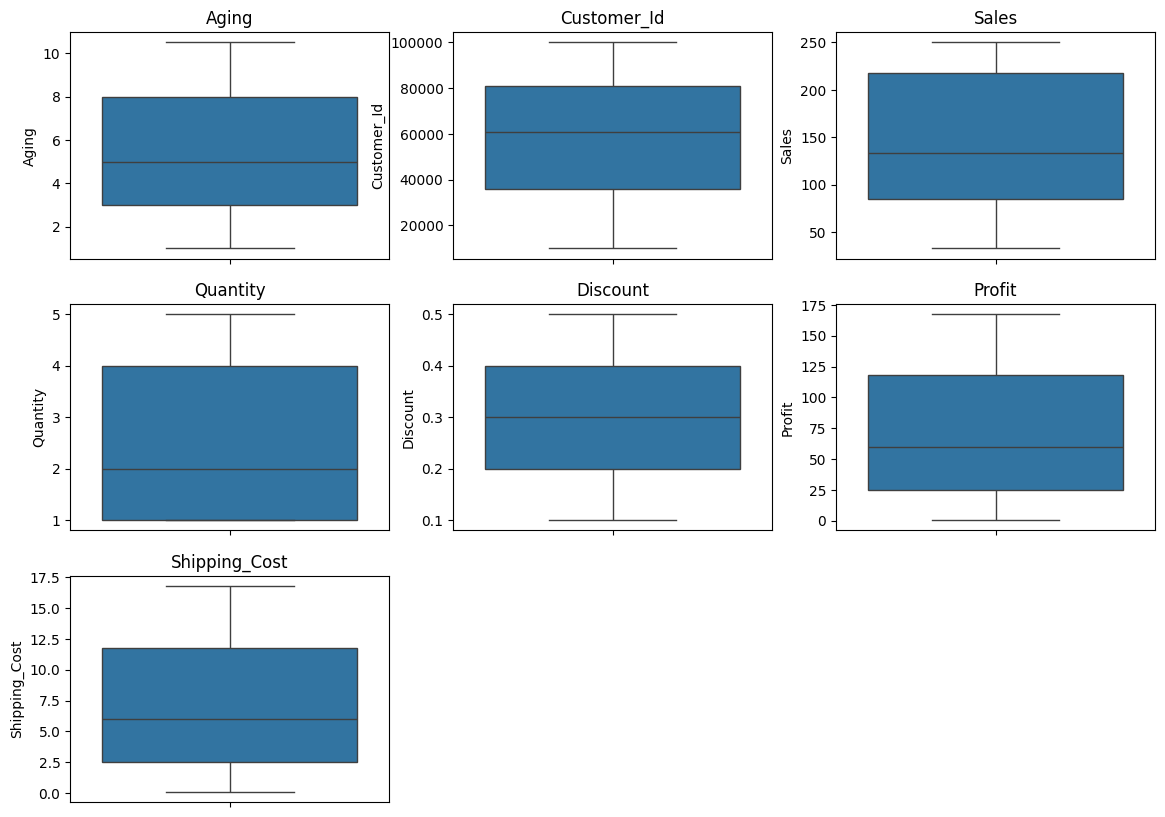

In [25]:
# Seleccionamos solo las columnas numéricas
numeric_cols_2 = df_2.select_dtypes(include='number').columns

# Creamos un boxplot por cada variable numérica
plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols_2, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_2[col])
    plt.title(col)
    #plt.tight_layout()

plt.show()


**Tipos Fecha**<br>
Para poder analizar las fechas y horas del dataset es importante poder agruparlas por periodo (por día, mes, hora). Para ello convertiré estas columnas al tipo **datetime**. Ésto me permitirá hacer análisis de perioricidad y por horario.

Tal como veíamos con ``df_2.info()`` hay 2 columnas con este tipo de dato:

``0   Order_Date           51290 non-null  object`` >> Ejemplo de un dato: 2018-01-02

``1   Time                 51290 non-null  object`` >> Ejemplo de un dato: 10:56:33

In [26]:
# convierto Order_Date en tipo datetime
df_2['Order_Date'] = pd.to_datetime(df_2['Order_Date'], errors='coerce')

# convierto Time en tipo datetime (HH:MM:SS)
df_2['Time'] = pd.to_datetime(df_2['Time'], format='%H:%M:%S', errors='coerce').dt.time


In [27]:
# comprobamos los cambios
print(type(df_2['Order_Date'][0]))
print(type(df_2['Time'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'datetime.time'>


#### 3.2.5 Eliminación de los registros con valores nulos

Considerando que existen muy pocos registros con valores nulos, voy a eliminarlos para dejar el Dataset sólo con registros con valores válidos.
- Aging:            1 Nan
- Sales:            1 Nan
- Quantity:         2 Nan
- Discount:         1 Nan
- Shipping_Cost:    1 Nan
- Order_Priority:   2 Nan

In [28]:
# elimino los registros que contengan algún dato nulo
df_2 = df_2.dropna()

# muestro la información del Dataframe 2 limpio
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51282 non-null  datetime64[ns]
 1   Time                 51282 non-null  object        
 2   Aging                51282 non-null  float64       
 3   Customer_Id          51282 non-null  int64         
 4   Gender               51282 non-null  category      
 5   Device_Type          51282 non-null  category      
 6   Customer_Login_type  51282 non-null  category      
 7   Product_Category     51282 non-null  category      
 8   Product              51282 non-null  object        
 9   Sales                51282 non-null  float64       
 10  Quantity             51282 non-null  float64       
 11  Discount             51282 non-null  float64       
 12  Profit               51282 non-null  float64       
 13  Shipping_Cost        51282 non-null 

#### Conclusiones para el Dataset 2:
No hay outliers que pudieran desvirtuar los datos, y tampoco parece que haya ningún dato erróneo.
Había algunos registros con valores nulos, que he eliminado, ya que son tan pocos que no alteran el análisis del Dataset.

<div style="background-color:#909090;color:black;">

### 3.3. Estandarización de columnas y valores de las categorías
</div>

In [29]:
# creo una función para eliminar espacios en blanco y otros caracteres especiales, y poner los nombres en minúsculas
def estandarizar_columnas(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('(', '', regex=False)
        .str.replace(')', '', regex=False)
        .str.replace('/', '_', regex=False)
    )
    return df

# Aplicamos a los dataframes
df_1 = estandarizar_columnas(df_1)
df_2 = estandarizar_columnas(df_2)

In [30]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   user_id                   700 non-null    int64   
 1   device_model              700 non-null    object  
 2   operating_system          700 non-null    category
 3   app_usage_time_min_day    700 non-null    int64   
 4   screen_on_time_hours_day  700 non-null    float64 
 5   battery_drain_mah_day     700 non-null    int64   
 6   number_of_apps_installed  700 non-null    int64   
 7   data_usage_mb_day         700 non-null    int64   
 8   age                       700 non-null    int64   
 9   gender                    700 non-null    category
 10  user_behavior_class       700 non-null    int64   
dtypes: category(2), float64(1), int64(7), object(1)
memory usage: 51.0+ KB


In [31]:
# creo una función para estandarizar los valores de las variables categóricas

# Columnas categóricas en df_1
cat_cols_df1 = ['device_model', 'operating_system', 'gender']

# Columnas categóricas en df_2
cat_cols_df2 = ['gender', 'device_type', 'customer_login_type', 'product_category', 'order_priority', 'payment_method']

# Función para limpiar valores de texto/categoría
def limpiar_categorias(df, columnas):
    for col in columnas:
        if df[col].dtype.name in ['object', 'category']:
            df[col] = df[col].str.strip().str.lower() # al aplicarle métodos de string se convierte en tipo object
            df[col] = df[col].astype('category') # volvemos a convertir a category (no es lo óptimo) :-/
    return df

# Aplicamos a los dos dataframes
df_1 = limpiar_categorias(df_1, cat_cols_df1)
df_2 = limpiar_categorias(df_2, cat_cols_df2)


<div style="background-color:#909090;color:black;">

### 3.4. Guardado de Datasets limpios
</div>

Una vez limpios y estandarizadas las variables de ambos Datasets, es hora de guardarlos como CSVs diferenciados de los originales.

In [35]:
# Guardamos el Dataframe 1 como copia limpia del Dataset 1

df_1.to_csv('data/cleaned_user_behavior.csv', index=False)

In [36]:
# Guardamos el Dataframe 2 como copia limpia del Dataset 2
df_2.to_csv('data/cleaned_ecommerce.csv', index=False)

In [48]:
# Constantes
AZUL_X = '#4292c6'

<div style="background-color:#cdcdcd;color:black;">

## 4. Análisis Exploratorio General

</div>

<div style="background-color:#909090;color:black;">

### 4.1. Dataset 1 - Comportamiento de usuarios en dispositivos móviles
</div>

In [37]:
# Carga del Dataset 1 previamente limpiado
df_1c = pd.read_csv('data/cleaned_user_behavior.csv')
df_1c.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   user_id                   700 non-null    int64  
 1   device_model              700 non-null    object 
 2   operating_system          700 non-null    object 
 3   app_usage_time_min_day    700 non-null    int64  
 4   screen_on_time_hours_day  700 non-null    float64
 5   battery_drain_mah_day     700 non-null    int64  
 6   number_of_apps_installed  700 non-null    int64  
 7   data_usage_mb_day         700 non-null    int64  
 8   age                       700 non-null    int64  
 9   gender                    700 non-null    object 
 10  user_behavior_class       700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


C:\Users\xabi\AppData\Local\Temp\ipykernel_8840\1070755870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_1c, x='user_behavior_class', palette= paleta_clases)


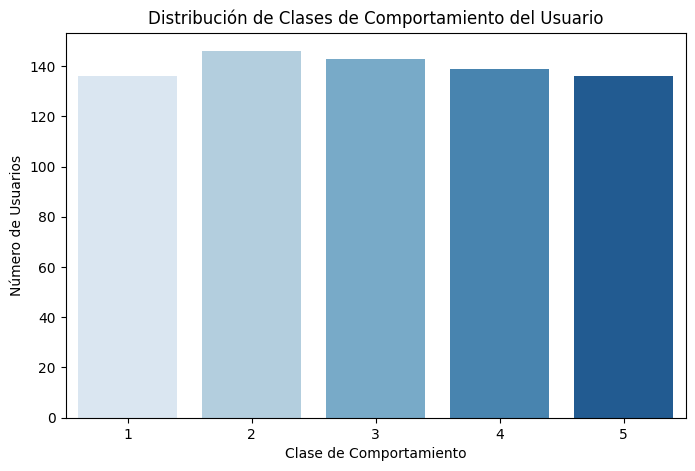

In [38]:
# Gráfico descriptivo sobre la representación que tiene cada 'clase de comportamiento' en el Dataset

paleta_clases = sns.color_palette("Blues", n_colors=5)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_1c, x='user_behavior_class', palette= paleta_clases)
plt.title('Distribución de Clases de Comportamiento del Usuario')
plt.xlabel('Clase de Comportamiento')
plt.ylabel('Número de Usuarios')
plt.show();


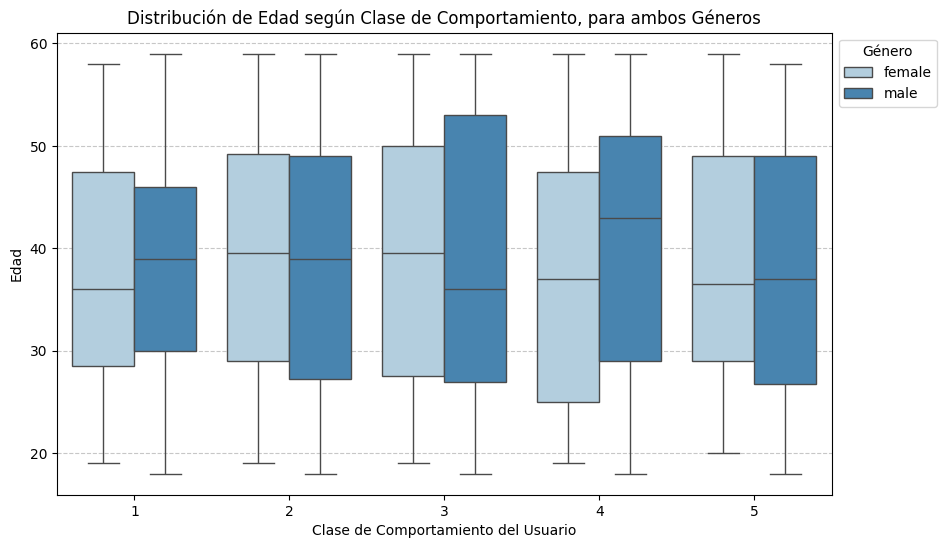

In [39]:
# Gráfico descriptivo sobre la distribución de Edad y Género según la 'Clase de comportamiento'
 
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_1c,
    x='user_behavior_class',
    y='age',
    palette='Blues',
    hue='gender'
    )
plt.title('Distribución de Edad según Clase de Comportamiento, para ambos Géneros')
plt.xlabel('Clase de Comportamiento del Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Edad')
plt.legend(title= 'Género', loc=2, bbox_to_anchor=(1, 1))
plt.show();

C:\Users\xabi\AppData\Local\Temp\ipykernel_8840\2748194058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(


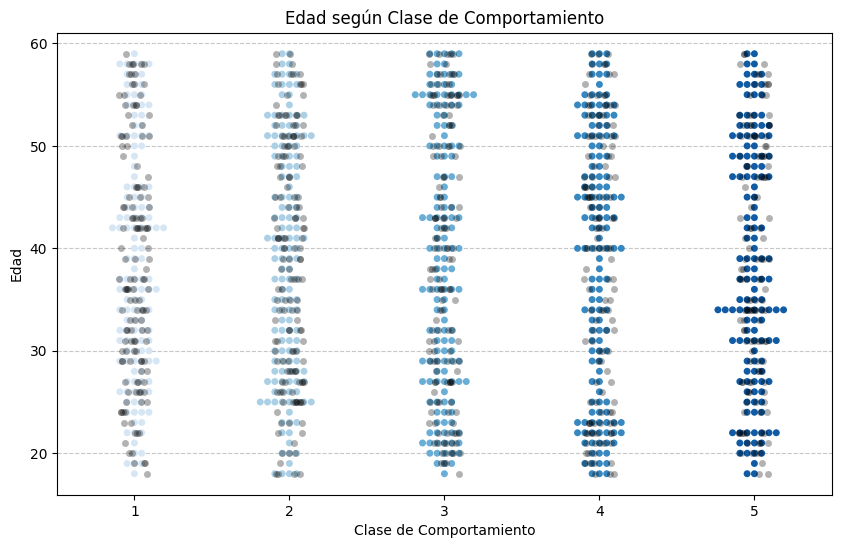

In [41]:
# Gráfico descriptivo sobre la distribución por puntos de la Edad según la 'Clase de comportamiento'

plt.figure(figsize=(10, 6))
sns.swarmplot(
    data=df_1c,
    x='user_behavior_class',
    y='age',
    palette='Blues',
    size=5
    )

sns.stripplot(
    data=df_1c,
    x='user_behavior_class',
    y='age',
    color='black',
    alpha=0.3,
    jitter=True
    )

plt.title('Edad según Clase de Comportamiento')
plt.xlabel('Clase de Comportamiento')
plt.ylabel('Edad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### Observación general sobre el Dataset 1
Analizamos la variable `User Behavior Class`, que clasifica el comportamiento de los usuarios según su intensidad de uso de dispositivos móviles (donde 5 es un uso muy intensivo). Se observa que el dataset presenta una distribución sorprendentemente balanceada entre las cinco clases, con una frecuencia bastante similar en cada una de ellas. Este equilibrio es poco habitual en datos reales de comportamiento digital, donde lo normal sería encontrar una mayor concentración de usuarios en clases de uso bajo o medio, y menos usuarios en las clases de mayor intensidad.

Este patrón perfectamente equilibrado puede ser una señal de que los datos han sido generados sintéticamente o manipulados para cubrir un rango completo de perfiles de usuario, en lugar de reflejar una muestra natural del comportamiento real.

Aunque el uso de datos sintéticos no invalida su utilidad para ejercicios de aprendizaje y análisis exploratorio, es importante tenerlo en cuenta al interpretar los resultados y extraer conclusiones. Las relaciones descubiertas en el análisis deben considerarse como ejemplos potenciales de patrones, pero no necesariamente generalizables al comportamiento de usuarios reales.

<div style="background-color:#909090;color:black;">

### 4.2. Dataset 2 - Datos de un año de un Ecommerce
</div>

In [42]:
df_2c = pd.read_csv('data/cleaned_ecommerce.csv')
df_2c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51282 entries, 0 to 51281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_date           51282 non-null  object 
 1   time                 51282 non-null  object 
 2   aging                51282 non-null  float64
 3   customer_id          51282 non-null  int64  
 4   gender               51282 non-null  object 
 5   device_type          51282 non-null  object 
 6   customer_login_type  51282 non-null  object 
 7   product_category     51282 non-null  object 
 8   product              51282 non-null  object 
 9   sales                51282 non-null  float64
 10  quantity             51282 non-null  float64
 11  discount             51282 non-null  float64
 12  profit               51282 non-null  float64
 13  shipping_cost        51282 non-null  float64
 14  order_priority       51282 non-null  object 
 15  payment_method       51282 non-null 

C:\Users\xabi\AppData\Local\Temp\ipykernel_8840\253562018.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


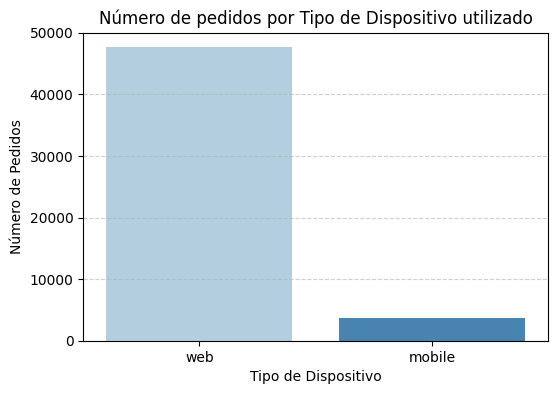

In [44]:
# Gráfico descriptivo sobre la distribución de pedidos por Tipo de Dispositivo utilizado 

plt.figure(figsize=(6, 4))

sns.countplot(
    data=df_2c,
    x='device_type',
    palette='Blues')

plt.title('Número de pedidos por Tipo de Dispositivo utilizado')
plt.xlabel('Tipo de Dispositivo')
plt.ylabel('Número de Pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show();


C:\Users\xabi\AppData\Local\Temp\ipykernel_8840\365140757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


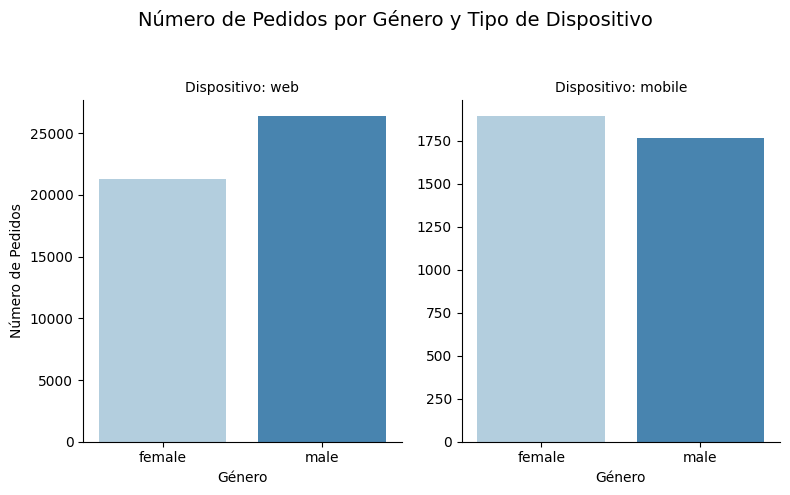

In [46]:
# Gráfico descriptivo con el Número de pedidos por Tipo de dispositivo y por Género.
g = sns.catplot(
    data=df_2c,
    kind='count',
    x='gender',
    col='device_type',
    palette='Blues',
    height=5,
    aspect=0.8,
    sharey = False
)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Número de Pedidos por Género y Tipo de Dispositivo', fontsize=14)
g.set_axis_labels("Género", "Número de Pedidos")
g.set_titles("Dispositivo: {col_name}")


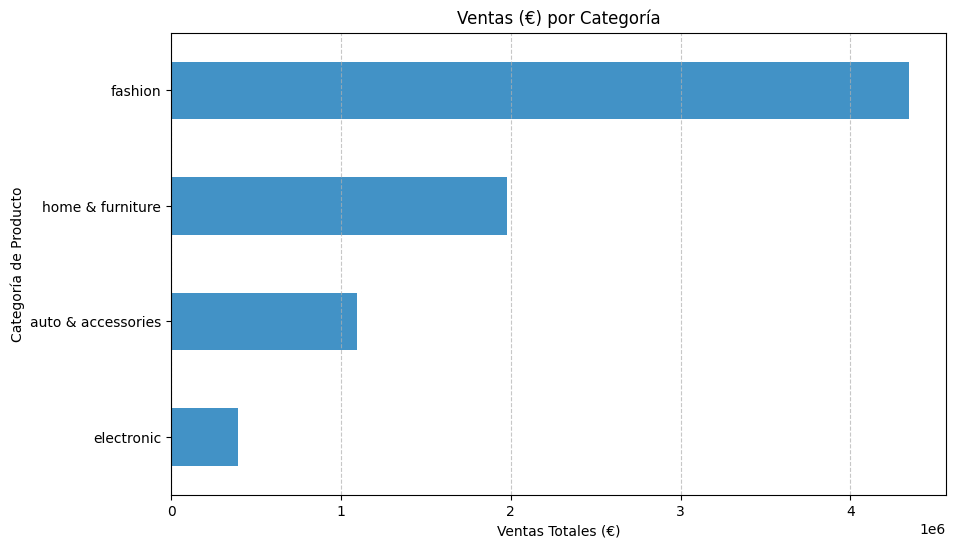

In [49]:
# Gráfico descriptivo de las Ventas (en Euros) por Categoría de Producto

categorias = df_2c.groupby('product_category')['sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

categorias.plot(
    kind='barh',
    color = AZUL_X
    )

plt.title('Ventas (€) por Categoría')
plt.xlabel('Ventas Totales (€)')
plt.ylabel('Categoría de Producto')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()
plt.show()


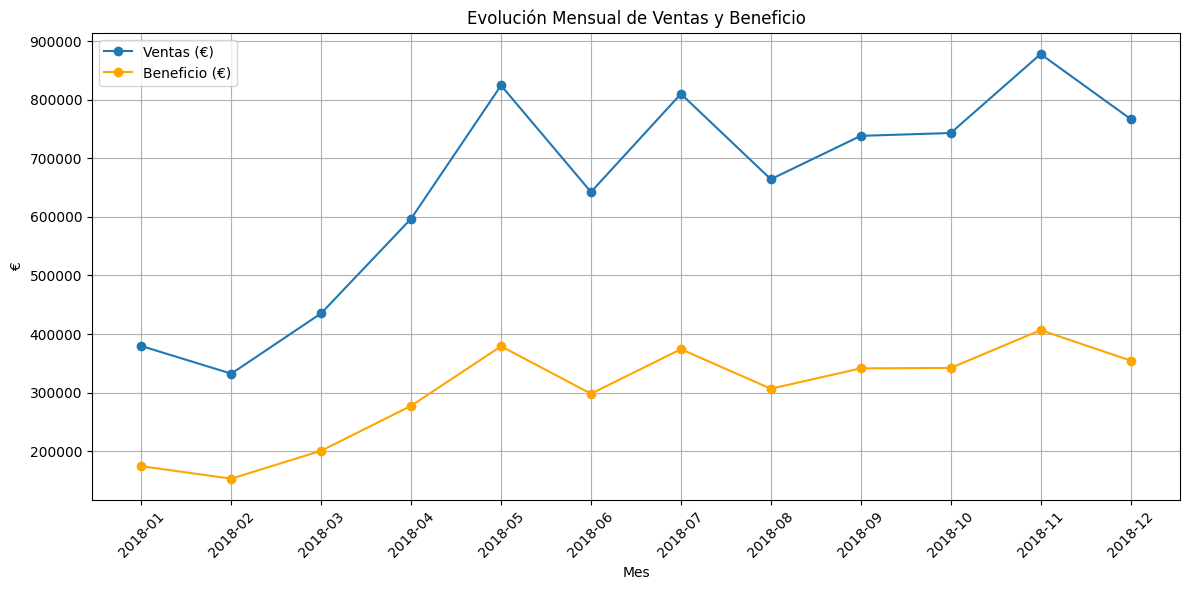

In [52]:
# Gráfico descriptivo que relaciona las Ventas (€) con el Beneficio

# Convierto order_date en un 'pandas datetime object'.
df_2c['order_date'] = pd.to_datetime(df_2c['order_date'])

# Añado una columna 'month' con año/mes
df_2c['month'] = df_2c['order_date'].dt.to_period('M')

# Agrupamos por mes y sumar el beneficio
monthly_summary = df_2c.groupby('month').agg(
    ventas=('sales', 'sum'),
    beneficio=('profit', 'sum')
).reset_index()

# gráficas
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_summary['month'].astype(str),
    monthly_summary['ventas'],
    marker='o',
    label='Ventas (€)',
    color='C0'
    )

plt.plot(
    monthly_summary['month'].astype(str),
    monthly_summary['beneficio'],
    marker='o',
    label='Beneficio (€)',
    color='orange'
    )

plt.title('Evolución Mensual de Ventas y Beneficio')
plt.xlabel('Mes')
plt.ylabel('€')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



#### Observaciones generales sobre el Dataset 2

El Dataset 2 contiene información detallada sobre más de 51.000 pedidos realizados a lo largo del año 2018. Destaca una clara predominancia del canal web frente al móvil, tanto en volumen como en uso generalizado. Sin embargo, hay suficientes registros (+ 3.500) para extraer conclusiones respecto a los pedidos realizados con dispositivos móviles. Las ventas están distribuidas en múltiples categorías, siendo “fashion” y “home & furniture” las más relevantes en términos de facturación. El campo `order_date` abarca todo el año y permite análisis estacionales, mientras que variables como `device_type`, `gender`, `order_priority` y `product_category` facilitan la segmentación por perfil de compra. El dataset es adecuado para estudios exploratorios y para contrastar hipótesis de comportamiento, aunque al tratarse de datos anonimizados, debemos ir con cautela a la hora de sacar conclusiones en relación a las segmentaciones de los clientes.

<div style="background-color:#cdcdcd;color:black;">

## 5. Análisis específico de las Hipótesis
</div>

<div style="background-color:#909090;color:black;">

### Hipótesis 1. Confianza del comprador
#### Los usuarios que compran desde el móvil previamente han comprado desde Desktop
</div>

La premisa básica de esta hipótesis es que los usuarios, antes de optar por comprar a través del móvil, adquirirían confianza con el ecommerce gracias a compras previas realizadas desde la web, con algún dispositivo Desktop (ordenador).

Si esto fuera así, desde el departamento de marketing se plantearían realizar más acciones dirigidas a dar a conocer la aplicación móvil entre los compradores Desktop.

Para verificar esta hipótesis voy a dar los siguientes pasos:
1. Filtrar los usuarios que hayan comprado al menos una vez por móvil.
2. Para cada usuario, identificar la fecha de su primera compra móvil.
3. Comprobar si antes de esa fecha el usuario había comprado por Desktop.
4. Calcular el porcentaje de casos que cumplen la hipótesis

El resultado esperado es que los usuarios, en su mayoría, sí que llegan a la primera compra móvil después de haber hecho alguna compra Desktop.


#### 1.1. Filtrar los usuarios que hayan comprado al menos una vez por móvil.

In [53]:
# 1. Filtramos los usuarios que hayan comprado al menos una vez por móvil.

# 1.1 Primero creamos una columna nueva que unifica fecha y hora y sea de tipo datetime
df_2c['order_datetime'] = pd.to_datetime(df_2c['order_date'].astype(str) + ' ' + df_2c['time'].astype(str))

# 1.2 filtramos a un dataframe las compras hechas desde el móvil
mobile_sales_df = df_2c[df_2c['device_type'] == 'mobile']

# 1.3. guardamos los IDs únicos de quienes han comprado vía móvil
mobile_customers = mobile_sales_df['customer_id'].unique()

total_purchases = len(df_2c)
print('# compras:', total_purchases)
total_mobile_purchases = len(mobile_sales_df)
print('# compras desde móvil:', total_mobile_purchases)
total_mobile_users = len(mobile_customers)
print('# compradores únicos desde móvil:', total_mobile_users)

# compras: 51282
# compras desde móvil: 3658
# compradores únicos desde móvil: 3557


### 1.2. Para cada usuario, identificar la fecha de su primera compra móvil.

In [54]:
# 2. Para cada usuario, identificamos la fecha de su primera compra móvil.

# 2.1. Ordenamos por usuario y datetime
mobile_sales_df = mobile_sales_df.sort_values(['customer_id', 'order_datetime'])

# 2.2. Seleccionamos la primera compra móvil de cada usuario
first_mobile_purchase = mobile_sales_df.drop_duplicates(subset=['customer_id'], keep='first')


### 1.3. Comprobar si antes de esa fecha el usuario había comprado por Desktop.

In [55]:
# 3. Comprobamos si antes de esa fecha el usuario había comprado por Desktop.

# 3.1. Guardamos en un dataframe solo las compras desde la 'web' (Desktop)
desktop_sales_df = df_2c[df_2c['device_type'] == 'web']
total_desktop_purchases = len(desktop_sales_df)
print('# compras desde web:', total_desktop_purchases)

# 3.2. Hacemos merge para asociar la fecha de primera compra móvil a cada usuario
merged_df = pd.merge(
    first_mobile_purchase[['customer_id', 'order_datetime']],
    desktop_sales_df,
    on='customer_id',
    suffixes=('_mobile', '_desktop')
)
total_desktop_mobile_purchases = len(merged_df)
print('# compras web de usuarios que también han comprado vía móvil:', total_desktop_mobile_purchases)

# 3.3. Buscamos compras Desktop previas a la primera compra móvil de cada usuario
merged_df = merged_df[merged_df['order_datetime_desktop'] < merged_df['order_datetime_mobile']]
total_desktop_purchases_prior_mobile = len(merged_df)
print('# compras web anteriores a la primera compra móvil:', total_desktop_purchases_prior_mobile)

# compras desde web: 47624
# compras web de usuarios que también han comprado vía móvil: 1979
# compras web anteriores a la primera compra móvil: 989


### 1.4. Calcular el porcentaje de casos que cumplen la hipótesis

In [56]:
################### RESULTADO DE LA HIPÓTESIS ###################

# 4.1. Guardamos aquellos usuarios que han comprado en Desktop antes que en móvil
users_with_prior_desktop = merged_df['customer_id'].unique()
total_users_with_prior_desktop = len(users_with_prior_desktop)

# 4.2. Cálculo del % que cumplen la hipótesis
percent_with_prior_desktop = (total_users_with_prior_desktop / total_mobile_users) * 100

print('\n\t- Número de compradores únicos desde móvil:', total_mobile_users)
print('\t- Número de personas que compraron vía desktop antes que vía móvil:', total_users_with_prior_desktop)
print(f'\t- Porcentaje de personas que compran desde desktop antes de comprar desde móvil: {percent_with_prior_desktop:.2f} %')


	- Número de compradores únicos desde móvil: 3557
	- Número de personas que compraron vía desktop antes que vía móvil: 821
	- Porcentaje de personas que compran desde desktop antes de comprar desde móvil: 23.08 %


### 1.5. Conclusiones

La hipótesis planteaba que la mayoría de usuarios que compran desde el móvil lo hacen tras haber comprado previamente desde Desktop. Sin embargo, **los datos muestran que solo el 23% de los compradores móviles habían realizado antes alguna compra desde Desktop**.

Por tanto, la mayor parte de las compras móviles corresponden a usuarios que no habían comprado previamente desde Desktop, lo que indica que **el canal móvil es una puerta de entrada directa para muchos clientes**.

Esto subraya la importancia de optimizar la experiencia de compra móvil y diseñar estrategias de captación específicas para usuarios que comienzan su recorrido digital directamente desde este canal.

* NOTA METODOLÓGICA<br>
Es importante tener en cuenta que este análisis se basa únicamente en el identificador de usuario (customer_id). Existe la posibilidad de que una misma persona utilice diferentes cuentas o cree un nuevo usuario para futuras compras, por lo que no podemos garantizar que todos los casos de transición de Desktop a móvil queden reflejados en los datos. En consecuencia, el porcentaje de usuarios que realmente han realizado compras previas desde Desktop antes de comprar en móvil podría ser mayor de lo que muestran estos resultados.

### 1.6. Visualizaciones

#### 1.6.1. Diagrama de tarta con porcentajes

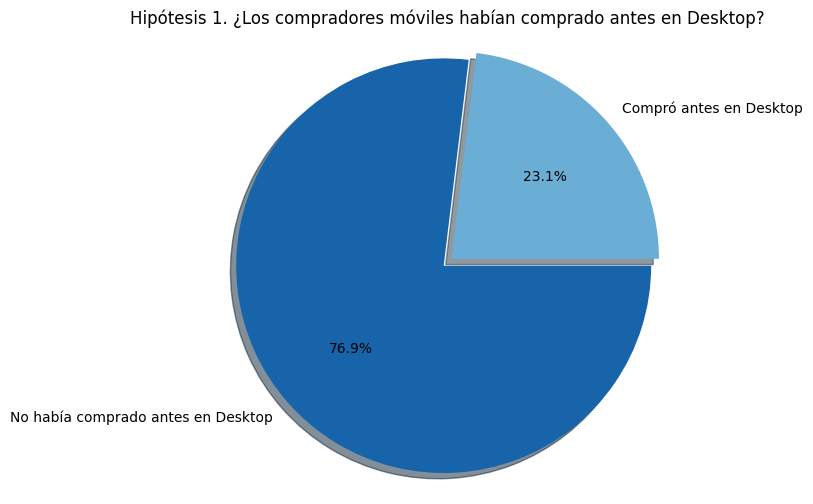

In [57]:
# Datos
labels = ['Compró antes en Desktop', 'No había comprado antes en Desktop']
sizes = [total_users_with_prior_desktop, total_mobile_users - total_users_with_prior_desktop]  # 821 sí, 2736 no

# Estilo
colors = plt.cm.Blues([0.5, 0.8])
explode = (0.05, 0)  # Para resaltar la primera porción

plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    explode=explode, 
    autopct='%1.1f%%',
    shadow=True
)
plt.title('Hipótesis 1. ¿Los compradores móviles habían comprado antes en Desktop?')
plt.axis('equal')  # Círculo perfecto

plt.show()


#### 1.6.2. Diagrama de barras secuenciales

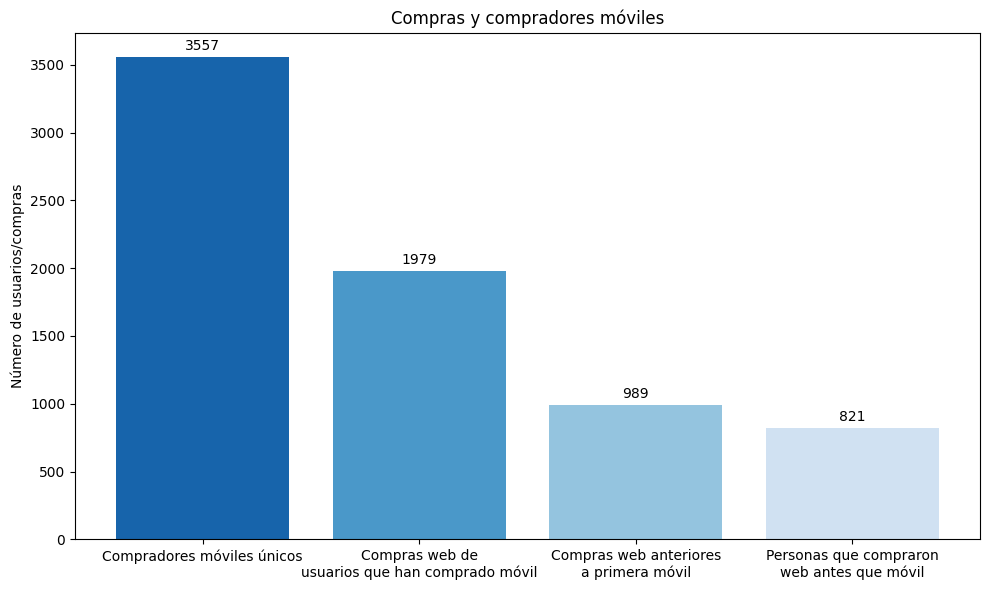

In [58]:
# Datos
etapas = [
    'Compradores móviles únicos',
    'Compras web de\nusuarios que han comprado móvil',
    'Compras web anteriores\na primera móvil',
    'Personas que compraron\nweb antes que móvil'
]
valores = [total_mobile_users, total_desktop_mobile_purchases, total_desktop_purchases_prior_mobile, total_users_with_prior_desktop]

plt.figure(figsize=(10, 6))
bars = plt.bar(
    etapas, 
    valores, 
    color=plt.cm.Blues([0.8, 0.6, 0.4, 0.2]))

plt.ylabel('Número de usuarios/compras')
plt.title('Compras y compradores móviles')

# Añade los valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 30,
        int(yval),
        ha='center',
        va='bottom'
        )

plt.tight_layout()
plt.show()
